In [1]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [2]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
from sklearn.preprocessing import StandardScaler



In [3]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [4]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


Exercise 3: Training a Classifier


In [5]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


In [6]:
Fisher.fit(X_Train,y_Train)


LinearDiscriminantAnalysis()

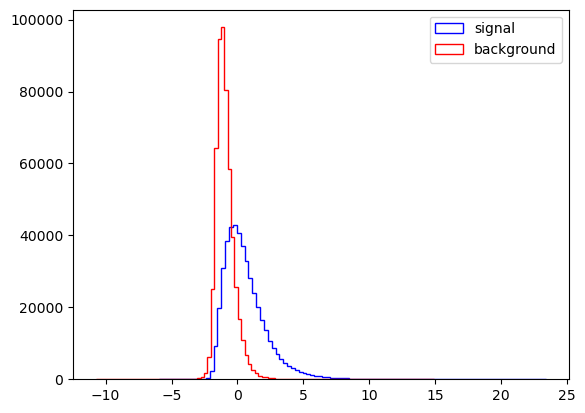

In [7]:

plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

In [8]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

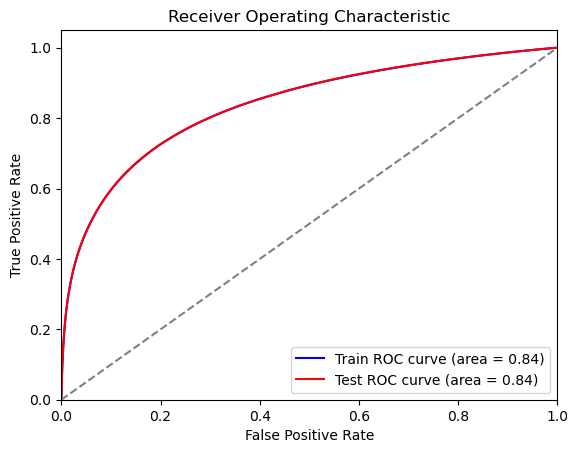

In [9]:

VarNames = [
    "signal", "l_1_pT", "l_1_eta", "l_1_phi", 
    "l_2_pT", "l_2_eta", "l_2_phi", "MET", 
    "MET_phi", "MET_rel", "axial_MET", "M_R", 
    "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", 
    "dPhi_r_b", "cos_theta_r1"
]

# 3a
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)
X_Test_scaled = scaler.transform(X_Test)
Fisher = LDA()
Fisher.fit(X_Train_scaled, y_Train)
fpr_train, tpr_train, _ = roc_curve(y_Train, Fisher.decision_function(X_Train_scaled))
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_Test, Fisher.decision_function(X_Test_scaled))
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


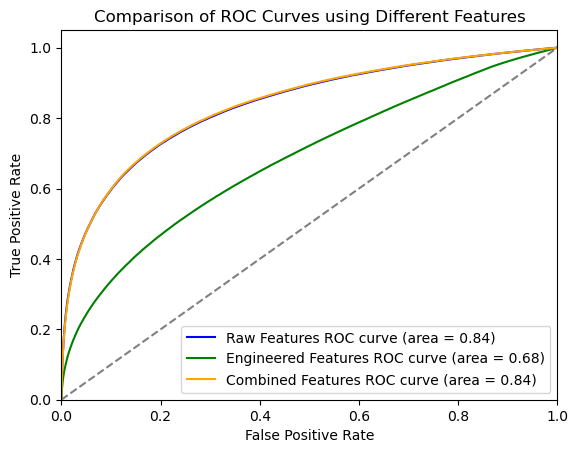

In [10]:
#3b 
engineered_features = pd.DataFrame({
    'l1_l2_pT_ratio': df['l_1_pT'] / (df['l_2_pT'] + 1e-9),  # avoid division by zero
    'M_R_MET_ratio': df['M_R'] / (df['MET'] + 1e-9),
    'combined_eta': df['l_1_eta'] + df['l_2_eta']
})
engineered_features_train = engineered_features[:N_Train]
engineered_features_test = engineered_features[N_Train:]



combined_features_train = pd.concat([X_Train.reset_index(drop=True), engineered_features_train.reset_index(drop=True)], axis=1)

combined_features_test = pd.concat([X_Test.reset_index(drop=True), engineered_features_test.reset_index(drop=True)], axis=1)
X_combined_scaled = scaler.fit_transform(combined_features_train)
X_combined_test_scaled = scaler.transform(combined_features_test)

Fisher_raw = LDA()

Fisher_raw.fit(X_Train_scaled, y_Train)

Fisher_engineered = LDA()
Fisher_engineered.fit(scaler.fit_transform(engineered_features_train), y_Train)

Fisher_combined = LDA()
Fisher_combined.fit(X_combined_scaled, y_Train)

fpr_raw, tpr_raw, _ = roc_curve(y_Test, Fisher_raw.decision_function(X_Test_scaled))
roc_auc_raw = auc(fpr_raw, tpr_raw)

fpr_engineered, tpr_engineered, _ = roc_curve(y_Test, Fisher_engineered.decision_function(scaler.transform(engineered_features_test)))
roc_auc_engineered = auc(fpr_engineered, tpr_engineered)

fpr_combined, tpr_combined, _ = roc_curve(y_Test, Fisher_combined.decision_function(X_combined_test_scaled))
roc_auc_combined = auc(fpr_combined, tpr_combined)

plt.figure()
plt.plot(fpr_raw, tpr_raw, color='blue', label='Raw Features ROC curve (area = %0.2f)' % roc_auc_raw)
plt.plot(fpr_engineered, tpr_engineered, color='green', label='Engineered Features ROC curve (area = %0.2f)' % roc_auc_engineered)
plt.plot(fpr_combined, tpr_combined, color='orange', label='Combined Features ROC curve (area = %0.2f)' % roc_auc_combined)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves using Different Features')
plt.legend(loc="lower right")
plt.show()

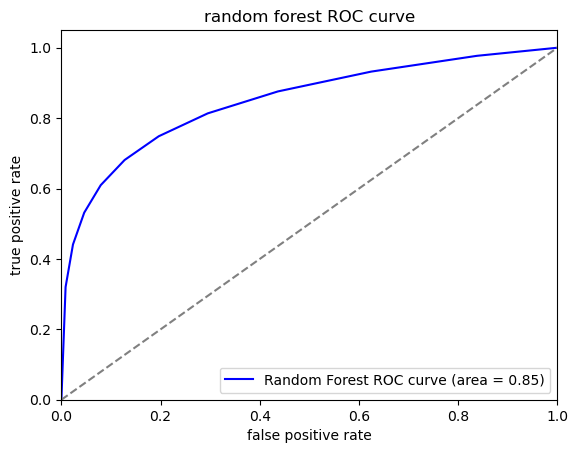

In [11]:
#4a
from sklearn.ensemble import RandomForestClassifier

n_estimators =10
max_depth =None   
n_jobs=-1        


rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, n_jobs=n_jobs, random_state=42)

rf_model.fit(X_Train_scaled, y_Train)

rf_probs = rf_model.predict_proba(X_Test_scaled)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_Test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('random forest ROC curve')
plt.legend(loc="lower right")
plt.show()


/usr/lib/python3/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


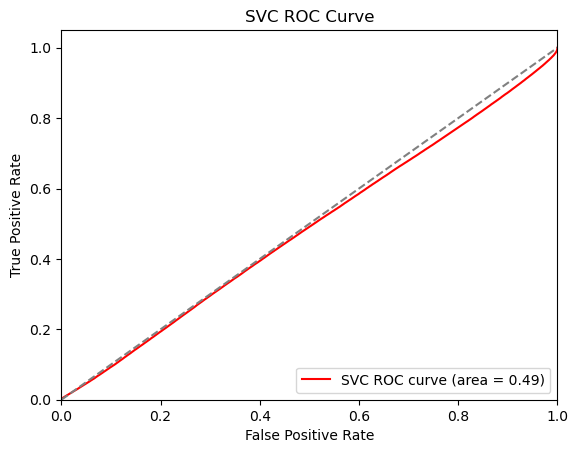

In [12]:
from sklearn.svm import SVC


n_samples = min(10000, len(X_Train_scaled))  #10,000 or fewer samples


indices = np.random.choice(len(X_Train_scaled), n_samples, replace=False)

X_Train_sampled = X_Train_scaled[indices]
y_Train_sampled = y_Train[indices]
svc_model = SVC(kernel='linear', probability=True, max_iter=1000, random_state=42)
svc_model.fit(X_Train_sampled, y_Train_sampled)
svc_probs = svc_model.predict_proba(X_Test_scaled)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_Test, svc_probs)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure()
plt.plot(fpr_svc, tpr_svc, color='red', label='SVC ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend(loc="lower right")
plt.show()


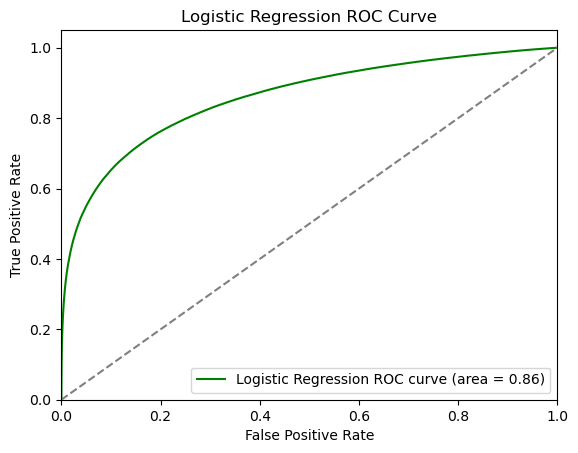

Logistic Regression ROC AUC: 0.86


In [13]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_Train_scaled, y_Train)



lr_probs = lr_model.predict_proba(X_Test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_Test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='green', label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()
print(f'Logistic Regression ROC AUC: {roc_auc_lr:.2f}')


/usr/lib/python3/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


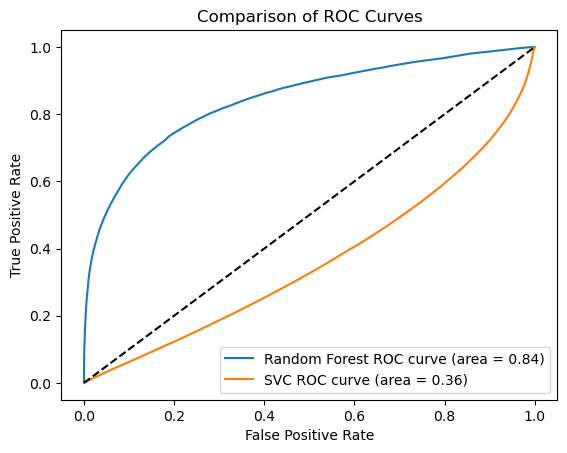

In [14]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import resample

def compare_classifiers(clf1, clf2, name1, name2, X_train, y_train, X_test, y_test):
    plt.figure()
    
    # FIRST CLASSIF
    clf1.fit(X_train, y_train)
    y_scores1 = clf1.predict_proba(X_test)[:, 1]
    fpr1, tpr1, _ = roc_curve(y_test, y_scores1)
    roc_auc1 = auc(fpr1, tpr1)
    plt.plot(fpr1, tpr1, label='%s ROC curve (area = %0.2f)' % (name1, roc_auc1))

    # second classifier
    clf2.fit(X_train, y_train)
    y_scores2 = clf2.predict_proba(X_test)[:, 1]
    fpr2, tpr2, _ = roc_curve(y_test, y_scores2)
    roc_auc2 = auc(fpr2, tpr2)
    plt.plot(fpr2, tpr2, label='%s ROC curve (area = %0.2f)' % (name2, roc_auc2))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparison of ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc1, roc_auc2

X_train_sampled, y_train_sampled = resample(X_Train_scaled, y_Train, n_samples=5000, random_state=42)


rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1, random_state=42)
svc_model = SVC(kernel='linear', probability=True, max_iter=1000, random_state=42)


roc_auc_rf, roc_auc_svc = compare_classifiers(rf_model, svc_model, 'Random Forest', 'SVC', X_train_sampled, y_train_sampled, X_Test_scaled, y_Test)




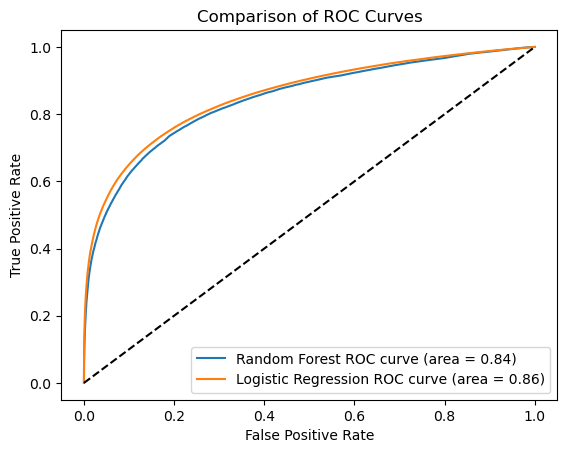

In [15]:


rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1, random_state=42)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# comparing
roc_auc_rf, roc_auc_logistic = compare_classifiers(rf_model, logistic_model, 'Random Forest', 'Logistic Regression', X_train_sampled, y_train_sampled, X_Test_scaled, y_Test)



In [16]:
N_S = np.sum(y_Test == 1)  
N_B = np.sum(y_Test == 0)  


if (N_S + N_B) > 0: 
    max_significance = N_S / np.sqrt(N_S + N_B)
else:
    max_significance = 0

print(f'Maximal significance σ_S: {max_significance:.2f}')


Maximal significance σ_S: 458.23


suggests the classifier is making a strong distinction between signal and background classes

In [17]:



def compute_metrics(y_true, y_scores):
    y_pred = (y_scores >= 0.5).astype(int)

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    return {
        'FPR': fpr,
        'TPR': tpr,
        'ROC AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    }


rf_model.fit(X_train_sampled, y_train_sampled)
y_scores_rf = rf_model.predict_proba(X_Test_scaled)[:, 1]

N_S =np.sum(y_Test ==1)  

N_B =np.sum(y_Test== 0)  
max_significance = N_S / np.sqrt(N_S + N_B) if (N_S + N_B) > 0 else 0
metrics_rf = compute_metrics(y_Test, y_scores_rf)

logistic_model.fit(X_train_sampled, y_train_sampled)
y_scores_logistic= logistic_model.predict_proba(X_Test_scaled)[:, 1]
metrics_logistic = compute_metrics(y_Test, y_scores_logistic)
metrics_data= {
    'Metric': ['ROC AUC', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Maximal Significance'],
    'Random Forest': [
        metrics_rf['ROC AUC'],
        metrics_rf['Precision'],
        metrics_rf['Recall'],
        metrics_rf['F1 Score'],
        metrics_rf['Accuracy'],
        max_significance
    ],
    'Logistic Regression': [
        metrics_logistic['ROC AUC'],
        metrics_logistic['Precision'],
        metrics_logistic['Recall'],
        metrics_logistic['F1 Score'],
        metrics_logistic['Accuracy'],
        max_significance
    ]
}

metrics_df = pd.DataFrame(metrics_data)



In [18]:
metrics_df


,Metric,Random Forest,Logistic Regression
0,ROC AUC,0.844031,0.856242
1,Precision,0.805675,0.823925
2,Recall,0.677710,0.682517
3,F1 Score,0.736173,0.746584
4,Accuracy,0.777413,0.787683
5,Maximal Significance,458.233000,458.233000
